In [16]:
import sys

import numpy as np
from imageio.v2 import imread
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#im = imread("blake_face.png")
im = imread("CharlieERick.jpg")
im.shape
if im.shape[2] > 3:
    im = im[:,:,0:3]
im.shape

(420, 739, 3)

In [17]:
im[:, :, 0]

array([[139, 140, 141, ..., 138, 138, 138],
       [141, 141, 142, ..., 138, 138, 138],
       [142, 142, 141, ..., 138, 138, 138],
       ...,
       [ 67,  64,  59, ..., 234, 234, 234],
       [ 73,  66,  58, ..., 234, 234, 234],
       [ 74,  67,  58, ..., 233, 233, 233]], shape=(420, 739), dtype=uint8)

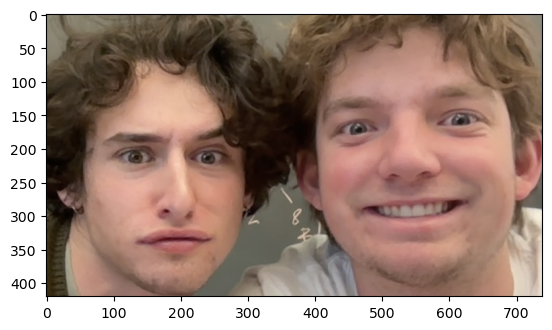

In [18]:
imgplot = plt.imshow(im)
plt.show()

In [19]:
# shoutout Karthik Karanth and the MIT License
def calc_energy(img):
    filter_du = np.array([
        [1.0, 2.0, 1.0],
        [0.0, 0.0, 0.0],
        [-1.0, -2.0, -1.0],
    ])
    # This converts it from a 2D filter to a 3D filter, replicating the same
    # filter for each channel: R, G, B
    filter_du = np.stack([filter_du] * 3, axis=2)

    # same thing in the other direction
    filter_dv = np.array([
        [1.0, 0.0, -1.0],
        [2.0, 0.0, -2.0],
        [1.0, 0.0, -1.0],
    ])
    filter_dv = np.stack([filter_dv] * 3, axis=2)

    img = img.astype('float32')
    convolved = np.absolute(convolve(img, filter_du)) + np.absolute(convolve(img, filter_dv))

    # We sum the energies in the red, green, and blue channels
    energy_map = convolved.sum(axis=2)

    return energy_map

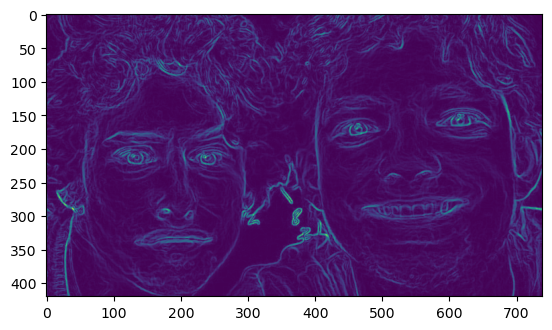

In [20]:
energies=calc_energy(im)
imgplot = plt.imshow(energies)
plt.show()

In [21]:
def minimum_seam(img):
    r, c, _ = img.shape
    energy_map = calc_energy(img)

    # Lets create a 2D array called M to store the minimum energy value seen upto that pixel. 
    # This is how we're doing dynamic programming. 
    # M[i,j] will contain the smallest energy at that point in the image, 
    # considering all the possible seams upto that point from the top of the image. 
    # So, the minimum energy required to traverse from the top of the image to bottom will be present in the last row of M. 
    # We need to backtrack from this to find the list of pixels present in this seam, so we’ll hold onto those values with a 2D array call backtrack.
    M = energy_map.copy()
    backtrack = np.zeros_like(M, dtype=int)

    for i in range(1, r):
        for j in range(0, c):
            # Handle the left edge of the image, to ensure we don't index -1
            if j == 0:
                idx = np.argmin(M[i - 1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = M[i - 1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 2])
                backtrack[i, j] = idx + j - 1
                min_energy = M[i - 1, idx + j - 1]

            M[i, j] += min_energy

    return M, backtrack

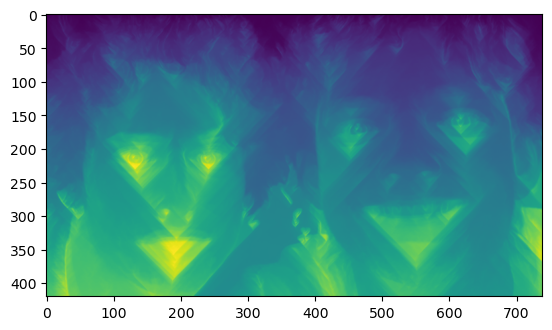

In [22]:
M, backtrack = minimum_seam(im)
imgplot = plt.imshow(M)
plt.show()

In [23]:
def carve_column(img):
    r, c, _ = img.shape

    M, backtrack = minimum_seam(img)

    # Create a (r, c) matrix filled with the value True
    # We'll be removing all pixels from the image which
    # have False later
    mask = np.ones((r, c), dtype=bool)

    # Find the position of the smallest element in the
    # last row of M
    j = np.argmin(M[-1])

    for i in reversed(range(r)):
        # Mark the pixels for deletion
        mask[i, j] = False
        j = backtrack[i, j]

    # Since the image has 3 channels, we convert our
    # mask to 3D
    mask = np.stack([mask] * 3, axis=2)

    # Delete all the pixels marked False in the mask,
    # and resize it to the new image dimensions
    img = img[mask].reshape((r, c - 1, 3))

    return img

In [24]:
def crop_c(img, scale_c):
    # scale factor between 0 and 1. For an image half original size, use 0.5
    r, c, _ = img.shape
    new_c = int(scale_c * c)

    for i in range(c - new_c): 
        print(i)
        img = carve_column(img)

    return img

In [28]:
cropped = crop_c(im, 0.7)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221


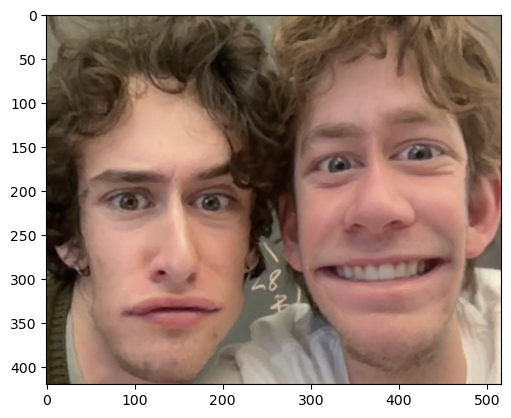

In [29]:
imgplot = plt.imshow(cropped)
plt.show()

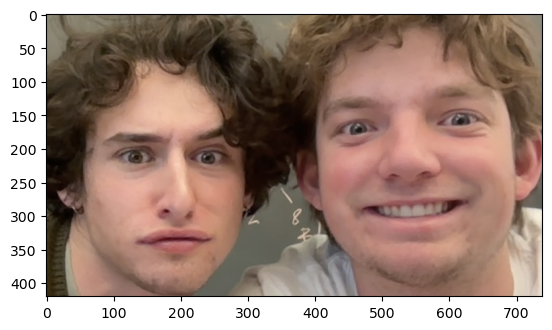

In [30]:
imgplot = plt.imshow(im)
plt.show()